## This notebook is wave propagating in non-reflecting boundary conditions

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
cd(dirname(pwd()))
cd("src")
include("Tools.jl")
include("FiniteDifference.jl")
include("TimeMarching.jl")
include("Initial.jl")
include("Systems.jl")
include("BoundaryCondition.jl")

using ..Tools
using ..FiniteDifference
using ..TimeMarching
using ..Initial
using ..Systems
using ..BoundaryCondition
pwd()

"C:\\Users\\liyux\\github\\thermo-network\\src"

## Parameters for the RHS

In [3]:
P=1;
Ac=1; # unreal
qw=0;

righthand=[0;0;P/Ac*qw]

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

## Initialization (wave)

In [20]:
    # Initial spacial variables
    nx = 201   
    gamma = 1.4
    xlim = (0.0,1.0)
    Δx = (xlim[2]-xlim[1])/nx
    ux,uu=Initial.initial_one_wave(nx,xlim,gamma)
#     ux,uu=Initial.initial_sod(nx,xlim,gamma)

    # get every property from the initial uu
    uueverythinginitial=Systems.UUtoEverything(uu,gamma)
    
    # Initial time and storage arrays
    t = 0.0
    thist = []
    uhist = []

#  plot(ux,uueverythinginitial.u,xlabel="z",label="Numerical")

0-element Array{Any,1}

## Time Marching (with boundary condition)


In [21]:
    Δt = 0.0001

    println("Δx=",Δx);
    println("Δt=",Δt);



    #Calculation time
    tf = 0.5
    tsample = tf/100;
    T = Δt:Δt:tf

    # Push it with time!
    for ti in T
        
        t, uu = TimeMarching.stegerwarmingrk1!(t,uu,righthand,ShockTubeSystem(gamma,Δt,Δx))

        uu[:,end]=set_outlet_costant_p_boundary!(uu,uueverythinginitial,Δx,Δt)
#         uu[:,end]=set_outlet_nonreflect_boundary!(uu,uueverythinginitial,Δx,Δt)
    
        # get every property from uu in every time step
        uueverything=Systems.UUtoEverything(uu,gamma)
    
    
        (isapprox(mod(t,tsample),0,atol=1e-12) || isapprox(mod(t,tsample),tsample,atol=1e-12)) ? push!(thist,deepcopy(t)) : nothing
        (isapprox(mod(t,tsample),0,atol=1e-12) || isapprox(mod(t,tsample),tsample,atol=1e-12)) ? push!(uhist,deepcopy(uueverything)) : nothing
    end+

    

Δx=0.004975124378109453
Δt=0.0001


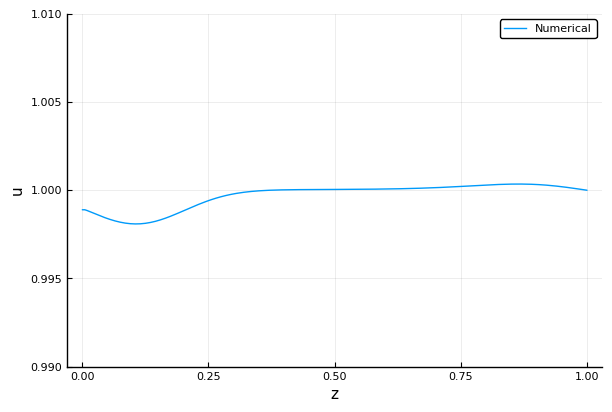

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\github\thermo-network\src\tmp.gif
└ @ Plots C:\Users\liyux\.juliapro\JuliaPro_v1.3.1-2\packages\Plots\B2J6j\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\liyux\\github\\thermo-network\\src\\tmp.gif")
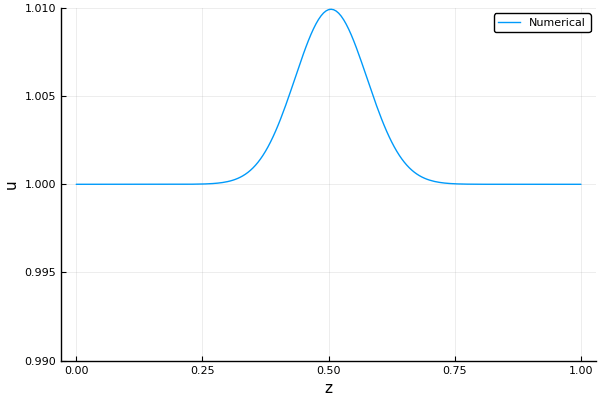

In [28]:
@gif for i in 1:length(uhist)
    plot(ux,uhist[i].p, ylim=(0.99,1.01), xlabel="z",ylabel="u",label="Numerical");
end

In [7]:
uu[1,end-1]

0.1249996998479813

In [8]:
uueverything.p[end-100]

UndefVarError: UndefVarError: uueverything not defined

In [9]:
uu[:,end-1]

3-element Array{Float64,1}:
 0.1249996998479813 
 0.12499441532266492
 2.562493493335289  

In [10]:
 λ = Array{Float64,2}(UndefInitializer(), 5,3)

5×3 Array{Float64,2}:
   3.96092e-320  4.96614e-316  1.52017e-315
 NaN             1.3893e-315   0.0         
   9.88131e-324  1.97626e-323  1.52016e-315
   1.52016e-315  1.4822e-323   1.37511e-315
   1.52016e-315  4.96294e-316  1.37511e-315

In [11]:
L=get_L_from_nonreflect_h!(uu::Array,uueverythinginitial,Δx::Float64)

d2=get_d_from_L(uu::Array,uueverythinginitial,L::Array)


UndefVarError: UndefVarError: get_L_from_nonreflect_h! not defined